In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Задача 1
### Условие 1

Скачать данные по ссылке

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Условие 2
Изучите стоимости недвижимости

Text(0, 0.5, 'Количество объектов')

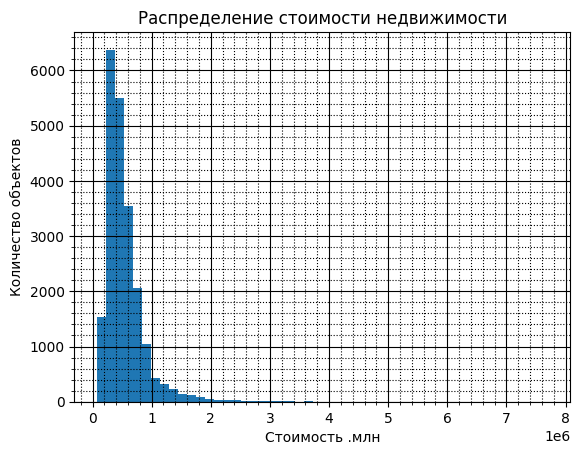

In [3]:
plt.hist(x=df['price'], bins=50)
plt.grid(which='major',
        color = 'k')
plt.minorticks_on()
plt.grid(which='minor',
        color = 'k',
        linestyle = ':')
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость .млн')
plt.ylabel('Количество объектов')


Вывод: Стоимость основной массы недвижимости в данных лежит от минимального значения до 1 млн., больше всего недвижимости в данных в диапазоне 0.2 - 0.8 млн.

### Условие 3
Изучите распределение квадратуры жилой

Text(0, 0.5, 'Количество объектов')

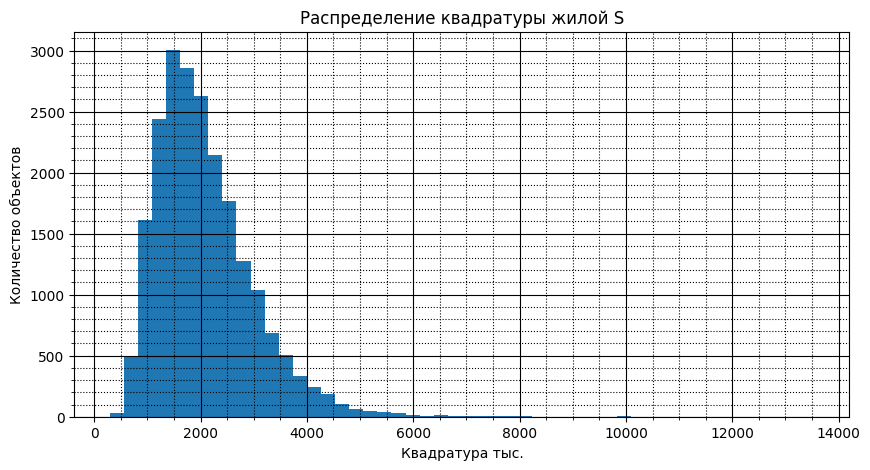

In [4]:
plt.figure(figsize=(10,5))
plt.hist(x=df['sqft_living'], bins=50)
plt.grid(which='major',
        color = 'k')
plt.minorticks_on()
plt.grid(which='minor',
        color = 'k',
        linestyle = ':')
plt.title('Распределение квадратуры жилой S')
plt.xlabel('Квадратура тыс.')
plt.ylabel('Количество объектов')

Основная масса недвижимости с площадью от 0,5 тыс. до 3.75 тыс., самое большое количество недвижимости в данных с площадью от 1 тыс. до 2.1 тыс.

### Условие 4

Изучите распределение года постройки

Text(0, 0.5, 'Количество объектов')

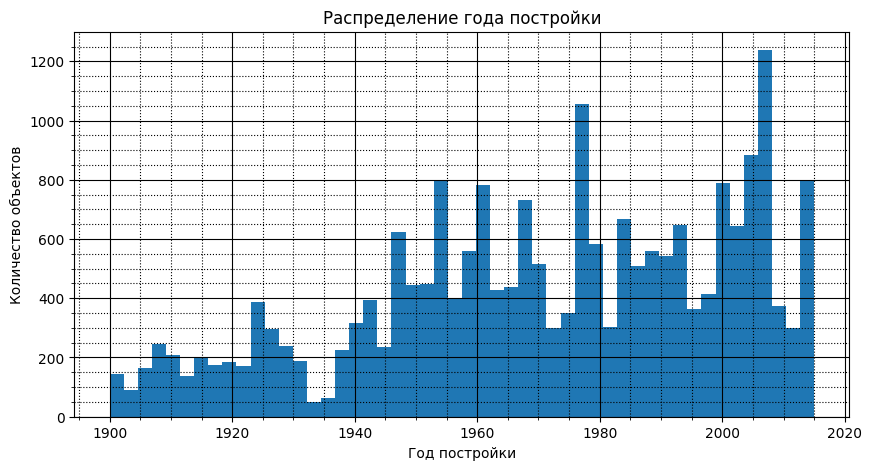

In [6]:
plt.figure(figsize=(10,5))
plt.hist(x=df['yr_built'], bins=50)
plt.grid(which='major',
        color = 'k')
plt.minorticks_on()
plt.grid(which='minor',
        color = 'k',
        linestyle = ':')
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество объектов')

Основные года построки 52-55,60-62,67-70,75-80, 2005-2008, 2012-2010

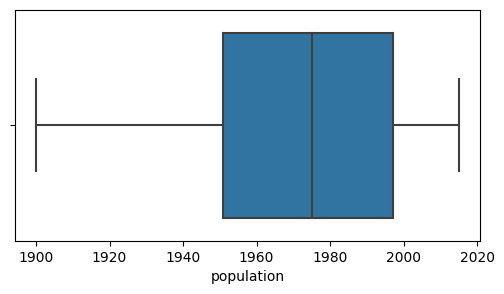

In [10]:
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['yr_built'], whis=1.5)

plt.xlabel('population')
plt.show()

Согласно графику boxplot основаная масса домов в данных от 1950 до 1998(99), самый популярный года в данных (медиана) примерно 1970-1980 года

## Задача 2

### Условие 1 
Изучите распределение домов от наличия вида на набережную

In [ ]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data.head()

no     21450
yes      163
Name: waterfront, dtype: int64

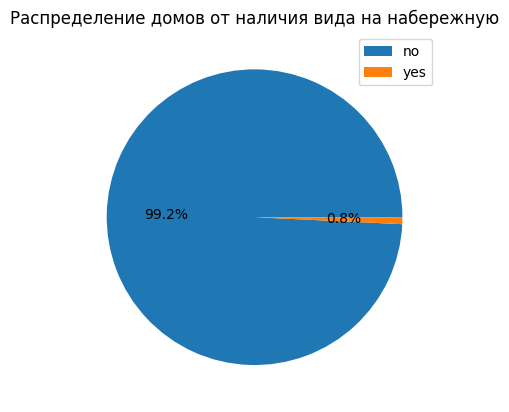

In [ ]:
plt.pie(data, autopct='%1.1f%%')

plt.title('Распределение домов от наличия вида на набережную')
plt.legend(data.index);

99,2% домов не имеют вида на набережную

### Условие 2
Изучите распределение этажей домов

Text(0, 0.5, 'Количество объектов')

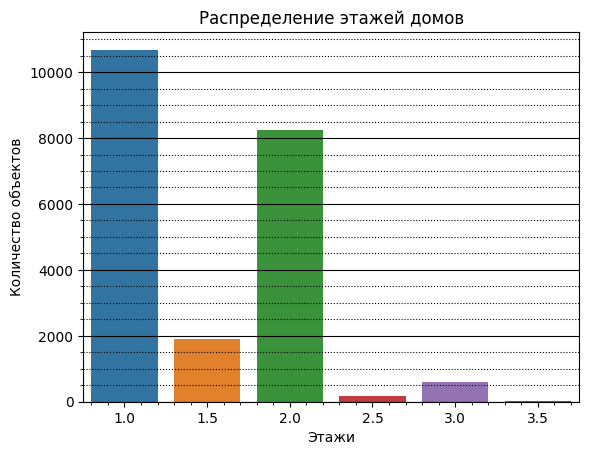

In [ ]:
floors_anls=df['floors'].value_counts()

sns.barplot(x=floors_anls.index, y=floors_anls.values)
plt.grid(which='major',
        color = 'k', axis="y")
plt.minorticks_on()
plt.grid(which='minor',
        color = 'k',
        linestyle = ':', axis="y")
plt.title('Распределение этажей домов')
plt.xlabel('Этажи')
plt.ylabel('Количество объектов')

Основная масса домов имеет этажность 1 и 2

### Условие 3
Изучите распределение состояния домов

Text(0, 0.5, 'Количество объектов')

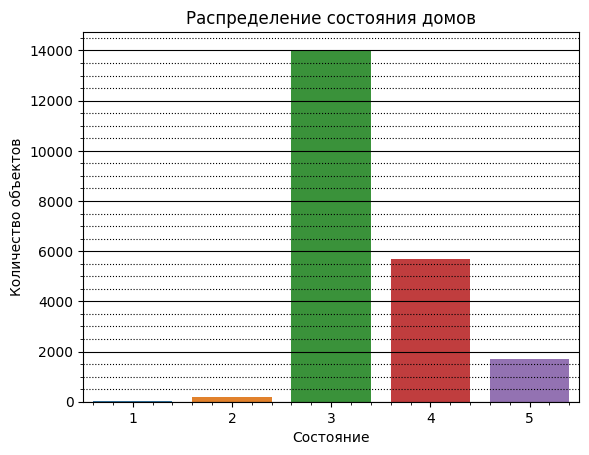

In [ ]:
conditions_anls=df['condition'].value_counts()

sns.barplot(x=conditions_anls.index, y=conditions_anls.values)

plt.grid(which='major',
        color = 'k', axis="y")
plt.minorticks_on()
plt.grid(which='minor',
        color = 'k',
        linestyle = ':', axis="y")
plt.title('Распределение состояния домов')
plt.xlabel('Состояние')
plt.ylabel('Количество объектов')

Большинство домов имеют состояние 3

## Задача 3
### Условие 1 
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [47]:
d_cond = df[(df['sqft_living']>2050) & (df['sqft_living']<2100)] #среднее значение по жилой квадратуре (2080) => взял диапазон 2050 - 2010, что бы отобрать средние
d_cond['sqft_lot'].describe() # здесь видим, что медиана со значением 7 888.5, поэтому отберем среди предыдущей выборки дома с общей квадратуре в диапазоне от 7800 до 7900
d_cond1 = d_cond[(d_cond['sqft_lot']>7700) & (d_cond['sqft_lot']<8000)]
d_cond1
# надо понимать, что в эти данные может приведены к усредненому показателю по квадратуре, но не кто не исключал влияние оценки состояния, вида, ремонта и года постройки.
# однако возьмем эти данные и проведем анализ влияние различных параметров на цену.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2348,251300260,20140515T000000,255000.0,4,2.50,2070,7800,2.0,0,0,...,8,2070,0,1989,0,98003,47.3487,-122.315,1950,7815
6624,2944510080,20141214T000000,242550.0,4,2.50,2060,7720,2.0,0,0,...,8,2060,0,1995,0,98023,47.2956,-122.374,1630,7720
7491,243000380,20150326T000000,365000.0,3,1.75,2080,7800,1.0,0,0,...,7,1220,860,1955,0,98166,47.4536,-122.355,1770,7860
8618,4077800088,20140811T000000,699950.0,4,2.00,2070,7830,1.0,0,1,...,7,1180,890,1941,0,98125,47.7058,-122.278,2390,7830
11650,8078350520,20140916T000000,550000.0,3,2.50,2080,7749,2.0,0,0,...,8,2080,0,1988,0,98029,47.5723,-122.021,2210,7471
12169,2472920800,20150423T000000,400000.0,3,2.50,2080,7877,2.0,0,0,...,9,2080,0,1987,0,98058,47.4395,-122.151,2550,7660
12285,7016200030,20150320T000000,480000.0,4,2.50,2080,7966,1.0,0,0,...,7,1200,880,1970,0,98011,47.7393,-122.181,1920,7500
15549,8118600080,20150220T000000,565000.0,4,2.00,2070,7980,1.5,0,0,...,7,2070,0,1940,0,98146,47.5092,-122.386,1600,7980
15619,8078550190,20150302T000000,329950.0,3,2.25,2070,7995,1.0,0,0,...,7,1350,720,1987,0,98031,47.4030,-122.175,1620,6799
15937,4222700130,20150304T000000,279000.0,3,2.25,2070,7800,1.0,0,0,...,7,1170,900,1964,0,98003,47.3431,-122.305,1570,8400


Посмотрим на анализ всех данных и посмотри, что можно взять для анализа

In [49]:
pd.options.display.float_format = '{0:.2f}'.format
d_cond1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,4363582652.83,397912.50,3.42,2.17,2070.83,7844.17,1.42,0.00,0.08,3.58,7.42,1634.17,436.67,1966.92,0.00,98052.75,47.48,-122.24,1901.67,7729.00
std,2873071265.31,149981.35,0.67,0.36,7.93,99.07,0.47,0.00,0.29,0.79,0.67,459.34,459.89,22.45,0.00,58.70,0.15,0.11,323.05,382.63
min,243000380.00,213500.00,2.00,1.50,2060.00,7713.00,1.00,0.00,0.00,3.00,7.00,1070.00,0.00,1930.00,0.00,98003.00,47.30,-122.39,1570.00,6799.00
25%,2734774518.25,273000.00,3.00,1.94,2067.50,7787.25,1.00,0.00,0.00,3.00,7.00,1195.00,0.00,1951.50,0.00,98010.25,47.37,-122.33,1627.50,7620.00
50%,4057400136.50,380000.00,3.50,2.25,2070.00,7815.00,1.25,0.00,0.00,3.00,7.00,1705.00,360.00,1967.00,0.00,98029.50,47.45,-122.23,1805.00,7767.50
75%,7281737652.50,497500.00,4.00,2.50,2080.00,7916.50,2.00,0.00,0.00,4.00,8.00,2070.00,882.50,1987.25,0.00,98074.75,47.58,-122.17,2015.00,7890.00
max,8118600080.00,699950.00,4.00,2.50,2080.00,7995.00,2.00,0.00,1.00,5.00,9.00,2080.00,990.00,1995.00,0.00,98166.00,47.74,-122.02,2550.00,8400.00


Можно посмотреть зависимость по параметрам кол-ва спален, ванн, этажность и оценок состояния и оценок эксперта, году постройки. По месту нахождения домов нет смысла брать, т.к. оно почти одинаково. 

### Зависимость кол-ва спален на цену

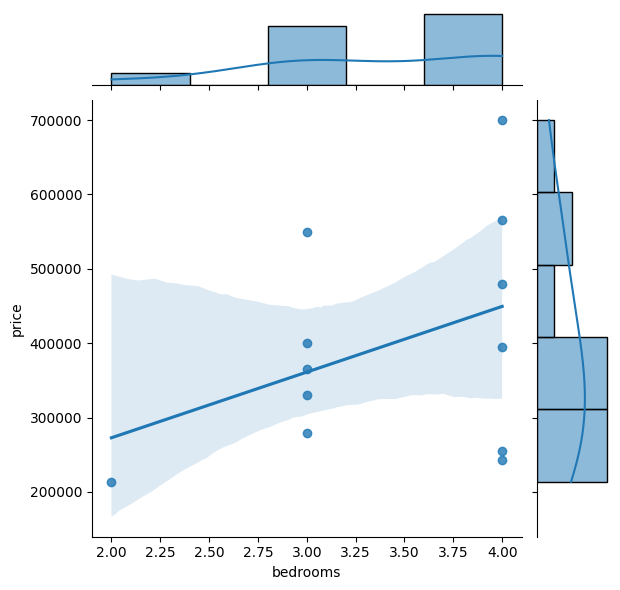

In [50]:
sns.jointplot(x=d_cond1['bedrooms'], y = d_cond1['price'], kind='reg');

Можно сделать вывод, что кол-во спален оказывает влияние на цену

### Зависимость кол-ва ванн на цену

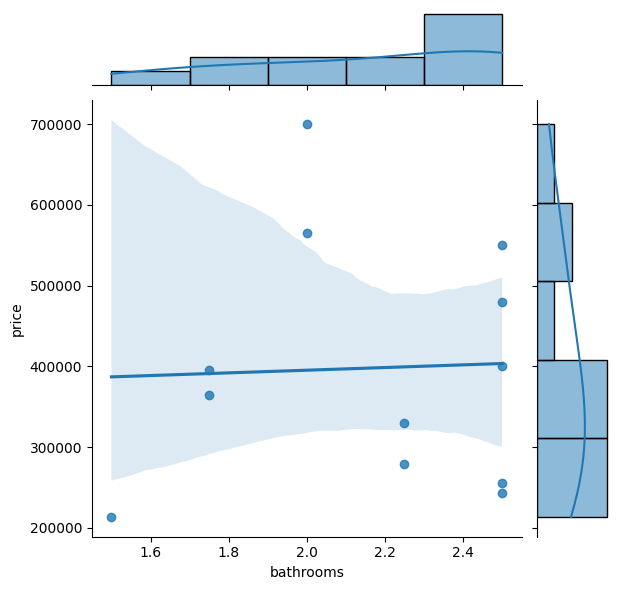

In [59]:
sns.jointplot(x=d_cond1['bathrooms'], y = d_cond1['price'], kind='reg');

Четкой корреляции не прослеживается

### Зависимость от этажности

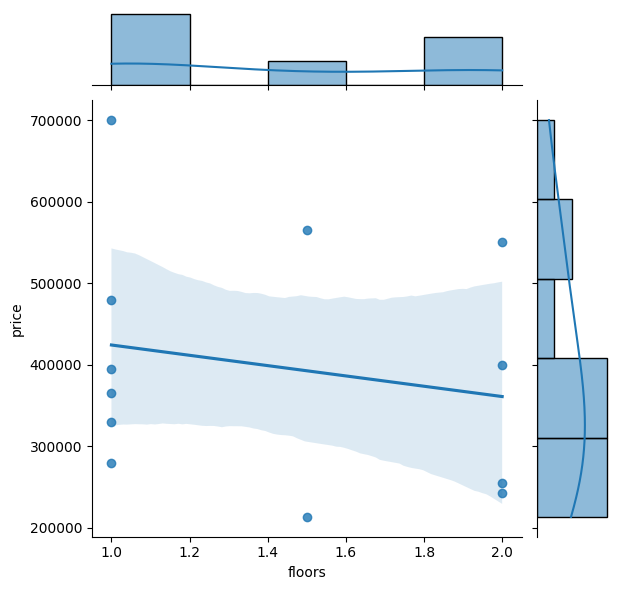

In [60]:
sns.jointplot(x=d_cond1['floors'], y = d_cond1['price'], kind='reg');

Можно сказать, что в представленных данных 1 этажные дома стоят немного дороже 2 этажных, но выборка очень маленькая, следовательно точность тоже.

### Зависимость от оценок эксперта

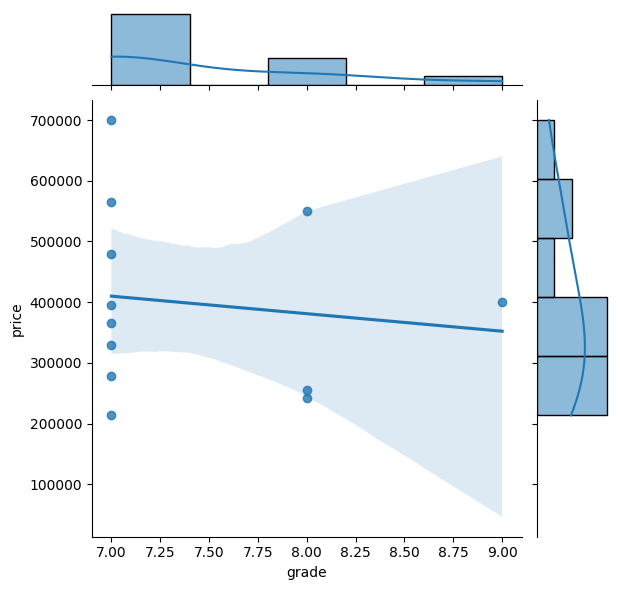

In [61]:
sns.jointplot(x=d_cond1['grade'], y = d_cond1['price'], kind='reg');

Четкой зависимости не прослеживается 

### Зависимость года постройки на цену

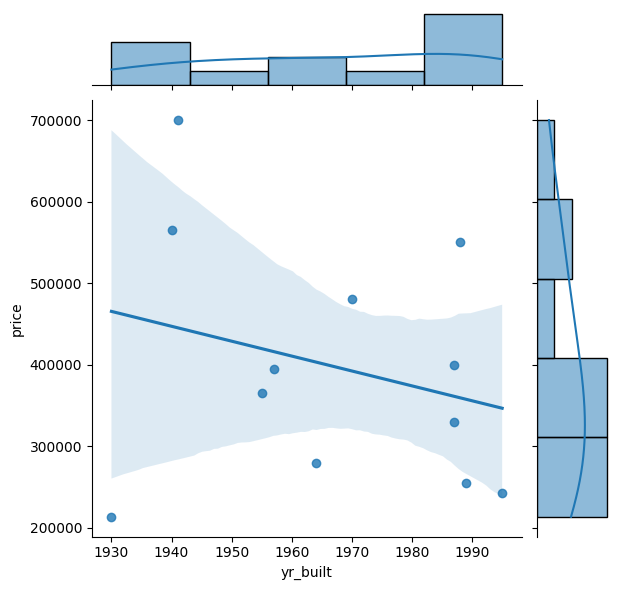

In [62]:
sns.jointplot(x=d_cond1['yr_built'], y = d_cond1['price'], kind='reg');

Разброс очень большой => сложно сказать о наличие влияния на данной выборке